Part A: Implement Perceptron

In [179]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer

In [180]:
import torch
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

torch.manual_seed(1234)

In [181]:
def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y

In [182]:
X, y = perceptron_data(n_points = 300, noise = 0.2)

In [183]:
def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

In [184]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

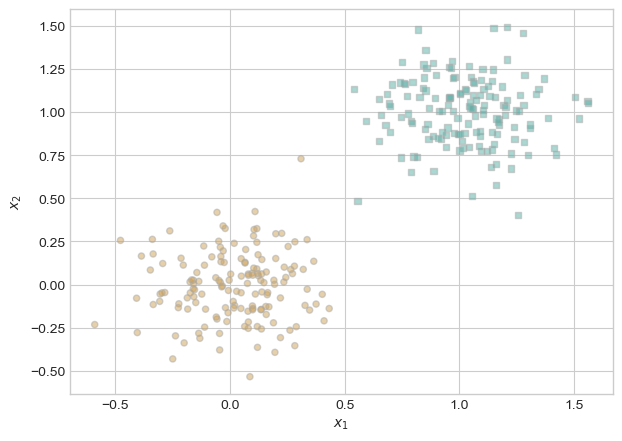

In [185]:
fig, ax = plt.subplots(1, 1)
X, y = perceptron_data()
plot_perceptron_data(X, y, ax)

GRAPHING LOSS FUNCTION OVER TIME

In [187]:
# instantiate a model and an optimizer
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

max_iterations = 100
iterations = 0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]

loss_threshold = 0.01

#while loss > 0: # dangerous -- only terminates if data is linearly separable
while iterations < max_iterations:
    # not part of the update: just for tracking our progress 

    if (loss < loss_threshold):
        break

    loss = p.loss(X, y) 
    loss_vec.append(loss)

    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
                
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)

    iterations += 1

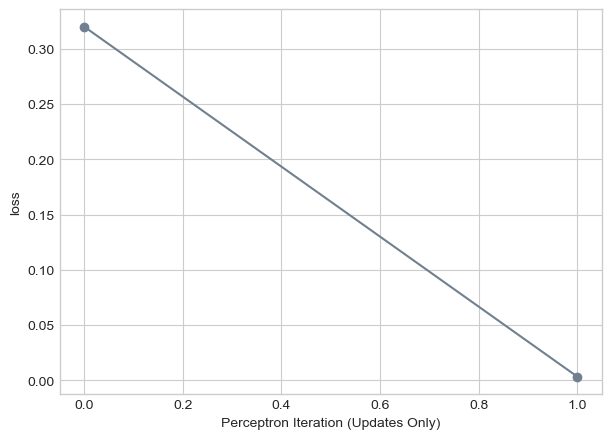

In [188]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

VISUALIZING PERCEPTRON ALGORITHM OVER SEVERAL ITERATIONS

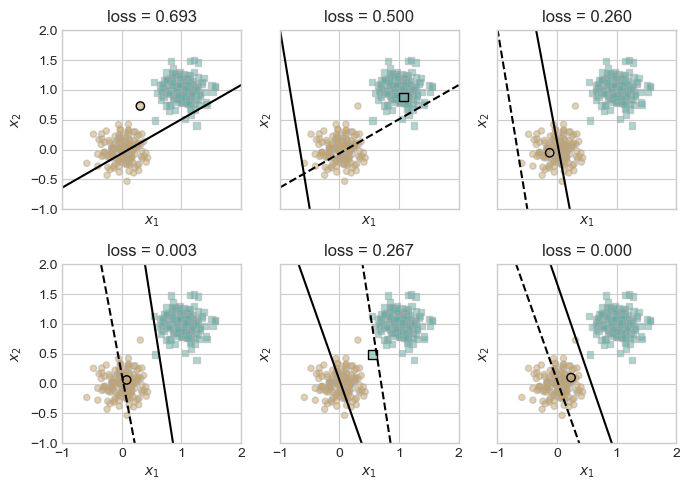

In [189]:
torch.manual_seed(1234567)

# initialize a perceptron 
p1 = Perceptron()
opt1 = PerceptronOptimizer(p1)
p1.loss(X, y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss = 1
loss_vec = []

while loss > 0:

    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(p1.w)

    # make an optimization step -- this is where the update actually happens
    # now p.w is the new value 

    #i, local_loss = opt.step(X, y)
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
                
    # perform a perceptron update using the random data point
    local_loss = opt1.step(x_i, y_i)

    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if local_loss > 0:
        plot_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
        loss = p1.loss(X, y).item()
        loss_vec.append(loss)
        draw_line(p1.w, x_min = -1, x_max = 2, ax = ax, color = "black")
        ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = markers[marker_map[y[i].item()]])
        # draw_line(w, -10, 10, ax, color = "black")
        ax.set_title(f"loss = {loss:.3f}")
        ax.set(xlim = (-1, 2), ylim = (-1, 2))
        current_ax += 1
plt.tight_layout()

NON-LINEARLY SEPARABLE DATA

In [190]:
def new_perceptron_data(n_points = 300, noise = 0.5, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y

In [191]:
X, y = new_perceptron_data(n_points = 300, noise = 0.5)

In [192]:
def plot_new_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

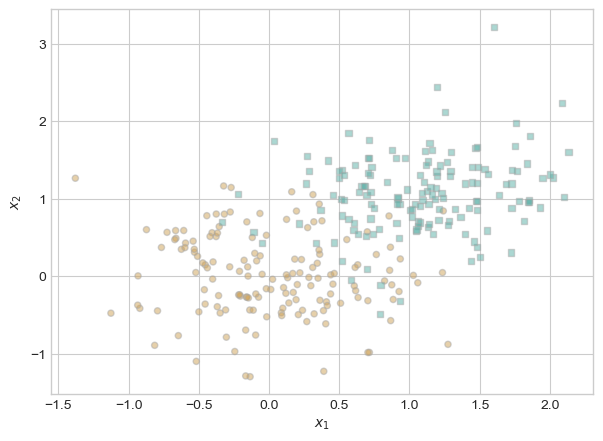

In [193]:
fig, ax = plt.subplots(1, 1)
X, y = new_perceptron_data()
plot_new_perceptron_data(X, y, ax)

In [194]:
# instantiate a model and an optimizer
p1 = Perceptron() 
opt1 = PerceptronOptimizer(p1)

loss = 1.0

max_iterations = 1000
iterations = 0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]

loss_threshold = 0.01

#while loss > 0: # dangerous -- only terminates if data is linearly separable
while iterations < max_iterations:
    # not part of the update: just for tracking our progress 

    if (loss < loss_threshold):
        break

    loss = p1.loss(X, y) 
    loss_vec.append(loss)

    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
                
    # perform a perceptron update using the random data point
    opt1.step(x_i, y_i)

    iterations += 1

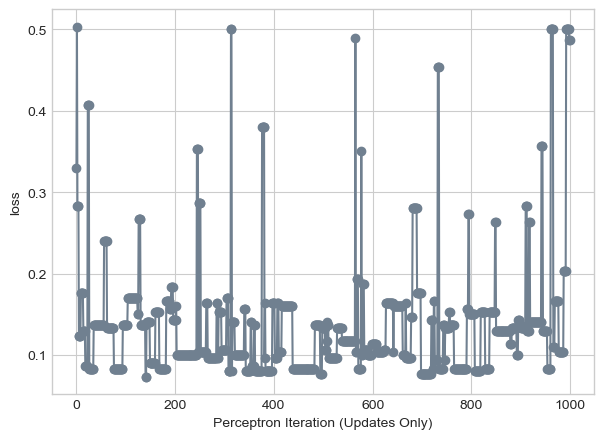

In [195]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

IndexError: index 6 is out of bounds for axis 0 with size 6

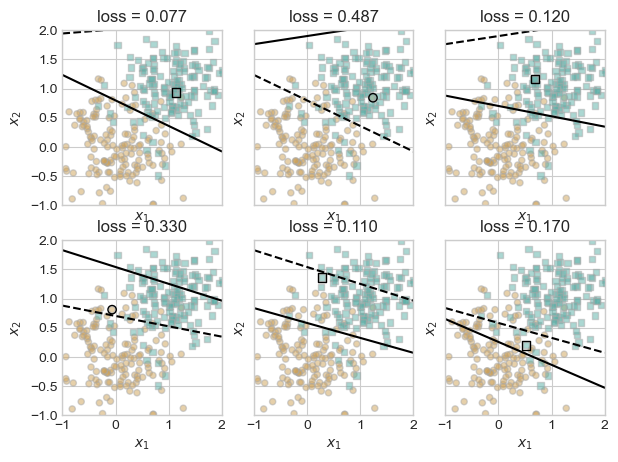

In [196]:
torch.manual_seed(1234567)

# initialize a perceptron 
#p = Perceptron()
#opt = PerceptronOptimizer(p)
p1.loss(X, y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss = 1
loss_vec = []

while loss > 0:

    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(p1.w)

    # make an optimization step -- this is where the update actually happens
    # now p.w is the new value 

    #i, local_loss = opt.step(X, y)
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
                
    # perform a perceptron update using the random data point
    local_loss = opt1.step(x_i, y_i)

    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if local_loss > 0:
        plot_new_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
        loss = p1.loss(X, y).item()
        loss_vec.append(loss)
        draw_line(p1.w, x_min = -1, x_max = 2, ax = ax, color = "black")
        ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = markers[marker_map[y[i].item()]])
        # draw_line(w, -10, 10, ax, color = "black")
        ax.set_title(f"loss = {loss:.3f}")
        ax.set(xlim = (-1, 2), ylim = (-1, 2))
        current_ax += 1
plt.tight_layout()

BEYOND 2 DIMENSIONS